In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import yfinance as yf
import tensorflow as tf

In [2]:
# df = yf.download("AAPL", start="2020-07-01", end="2020-09-20")
df = yf.download("005935.KS", start="2020-07-01", end="2020-09-20")

[*********************100%%**********************]  1 of 1 completed


In [3]:
print(df.shape)
df.dropna()

(57, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-01,46750.0,46850.0,46050.0,46100.0,41994.445312,1258369
2020-07-02,46150.0,46650.0,46000.0,46650.0,42495.464844,1461640
2020-07-03,46700.0,46950.0,46500.0,46900.0,42723.191406,1457760
2020-07-06,47100.0,47950.0,47050.0,47950.0,43679.683594,2257798
2020-07-07,48650.0,48950.0,47400.0,47600.0,43360.855469,2814307
2020-07-08,47000.0,47250.0,46500.0,46500.0,42358.820312,3104265
2020-07-09,46650.0,46800.0,46200.0,46500.0,42358.820312,1886506
2020-07-10,46600.0,46750.0,46100.0,46750.0,42586.554688,1784038
2020-07-13,46900.0,47200.0,46550.0,47200.0,42996.476562,2175062


In [4]:
numpyData = df.values
numpyData

array([[  46750.        ,   46850.        ,   46050.        ,
          46100.        ,   41994.4453125 , 1258369.        ],
       [  46150.        ,   46650.        ,   46000.        ,
          46650.        ,   42495.46484375, 1461640.        ],
       [  46700.        ,   46950.        ,   46500.        ,
          46900.        ,   42723.19140625, 1457760.        ],
       [  47100.        ,   47950.        ,   47050.        ,
          47950.        ,   43679.68359375, 2257798.        ],
       [  48650.        ,   48950.        ,   47400.        ,
          47600.        ,   43360.85546875, 2814307.        ],
       [  47000.        ,   47250.        ,   46500.        ,
          46500.        ,   42358.8203125 , 3104265.        ],
       [  46650.        ,   46800.        ,   46200.        ,
          46500.        ,   42358.8203125 , 1886506.        ],
       [  46600.        ,   46750.        ,   46100.        ,
          46750.        ,   42586.5546875 , 1784038.        ],


In [5]:
numpyDataShape = np.shape(numpyData)
numpyDataShape

(57, 6)

In [6]:
numpyDataShape = numpyData.shape
numpyDataShape

(57, 6)

In [7]:
closeValue = numpyData[: ,3: 4]
print(closeValue)

[[46100.]
 [46650.]
 [46900.]
 [47950.]
 [47600.]
 [46500.]
 [46500.]
 [46750.]
 [47200.]
 [47100.]
 [47450.]
 [47050.]
 [47100.]
 [46950.]
 [47700.]
 [47250.]
 [47050.]
 [47150.]
 [47500.]
 [49500.]
 [50200.]
 [50600.]
 [49500.]
 [49050.]
 [50000.]
 [49950.]
 [50500.]
 [50000.]
 [50100.]
 [50300.]
 [50700.]
 [50700.]
 [50600.]
 [50200.]
 [50100.]
 [48250.]
 [48650.]
 [48600.]
 [48750.]
 [49000.]
 [48400.]
 [48200.]
 [47500.]
 [47100.]
 [47100.]
 [47900.]
 [47500.]
 [48500.]
 [50000.]
 [49500.]
 [50700.]
 [50900.]
 [51900.]
 [52000.]
 [51700.]
 [51000.]
 [50900.]]


(57,) (57, 1)


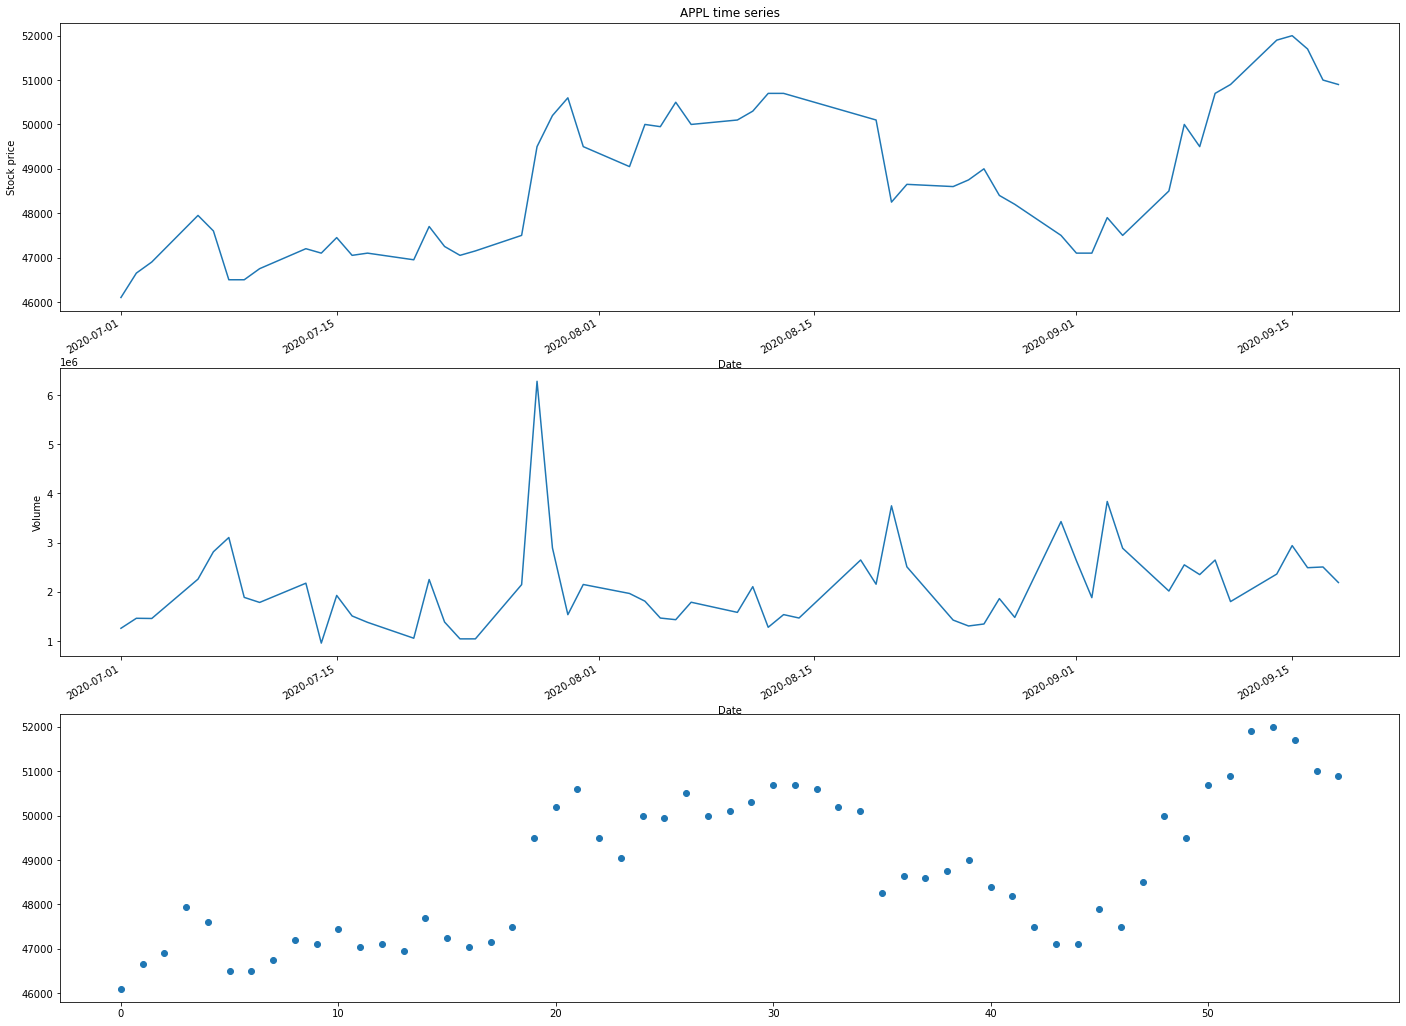

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(24, 20))
df.Close.plot(ax=ax1)
ax1.set(title = 'APPL time series', ylabel = "Stock price")

df.Volume.plot(ax=ax2)
ax2.set(ylabel = "Volume")

xval = np.arange(numpyDataShape[0])
print(xval.shape, closeValue.shape)
ax3.scatter(xval, closeValue)

In [9]:
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

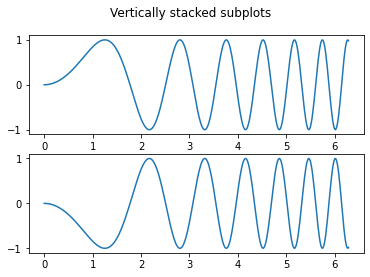

In [10]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
ax1.plot(x, y)
ax2.plot(x, -y)

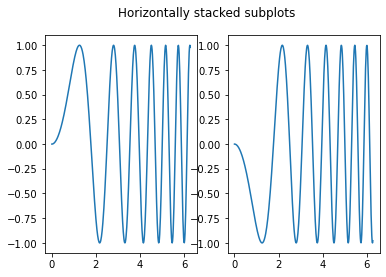

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Horizontally stacked subplots')
ax1.plot(x, y)
ax2.plot(x, -y)

In [12]:
N = 10
K = 1.5  # 임의로 설정한 값

df['SMA'] = df['Close'].rolling(window=N).mean()
df['STD'] = df['Close'].rolling(window=N).std()
df['Upper'] = df['SMA'] + (df['STD'] * K)
df['Lower'] = df['SMA'] - (df['STD'] * K)

In [13]:
df['Signal'] = 0  # 기본값은 0 (보류)
df.loc[df['Close'] > df['Upper'], 'Signal'] = -1  # 매도
df.loc[df['Close'] < df['Lower'], 'Signal'] = 1  # 매수

In [14]:
# TensorFlow 선형회귀
print(tf.__version__)
x_data = list(range(1, len(df['Signal'].dropna()) + 1))
y_data = df['Signal'].dropna().values

print(x_data)
print(y_data)

2.9.1
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0 -1 -1 -1  0  0
  0  0  0  0  0  0  0  0  0  0  0  1  1  0  0  0  0  0  1  1  1  0  0  0
 -1  0 -1 -1 -1  0  0  0  0]


In [15]:
# 입력 데이터와 출력 데이터 설정
x_data = list(range(len(y_data)))
y_data = df['Signal'].dropna().values[:]  # df['Signal']를 사용했기 때문에 출력 값을 Signal로 설정
print(len(x_data))
print(len(y_data))

57
57


In [16]:
# 학습률 설정
learning_rate = 0.0001

# 가중치 및 편향 초기화
W = tf.Variable(2.9)
b = tf.Variable(0.5)

x_axis_loop = []
y_axis_cost = []
h_list = []

print(W, b)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.9> <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.5>


In [17]:
# 20,000회 반복하여 모델 학습
for i in range(20000):
    with tf.GradientTape() as tape:
        hypothesis = W * x_data + b
        h_list.append(hypothesis)
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    W_grad, b_grad = tape.gradient(cost, [W, b])
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    
    if i > 500:
        x_axis_loop.append(i)
        y_axis_cost.append(cost)
        
    if i % 1000 == 0:
        print("{:.5f} | {:10.4f} | cost = {:10.6f}".format(i, W.numpy(), b.numpy(), cost))

0.00000 |     2.2852 | cost =   0.483649
1000.00000 |    -0.0118 | cost =   0.398054
2000.00000 |    -0.0112 | cost =   0.374703
3000.00000 |    -0.0106 | cost =   0.352520
4000.00000 |    -0.0100 | cost =   0.331446
5000.00000 |    -0.0095 | cost =   0.311426
6000.00000 |    -0.0090 | cost =   0.292407
7000.00000 |    -0.0085 | cost =   0.274338
8000.00000 |    -0.0081 | cost =   0.257173
9000.00000 |    -0.0076 | cost =   0.240867
10000.00000 |    -0.0072 | cost =   0.225375
11000.00000 |    -0.0068 | cost =   0.210658
12000.00000 |    -0.0065 | cost =   0.196677
13000.00000 |    -0.0061 | cost =   0.183395
14000.00000 |    -0.0058 | cost =   0.170778
15000.00000 |    -0.0055 | cost =   0.158791
16000.00000 |    -0.0052 | cost =   0.147403
17000.00000 |    -0.0049 | cost =   0.136585
18000.00000 |    -0.0046 | cost =   0.126307
19000.00000 |    -0.0043 | cost =   0.116544


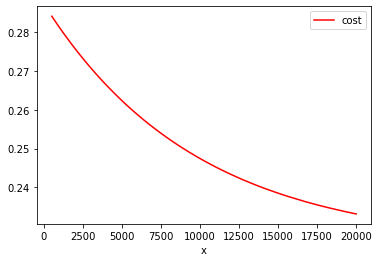

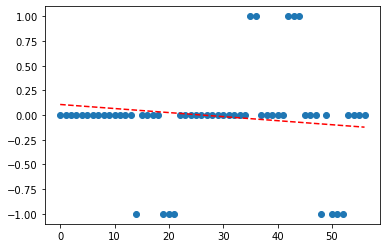

In [18]:
plt.plot(x_axis_loop, y_axis_cost, 'r-', label='cost')
plt.legend()
plt.xlabel('x')
plt.show()

plt.plot(x_data, y_data, 'o')
plt.plot(x_data, hypothesis, 'r--')